## Project By:Anamika Karmacharya(11) and Bidhi Shrivastav(21)

In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

C:\Users\Anamika\AppData\Local\Temp\ipykernel_22236\1032126578.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\Anamika\AppData\Local\Temp\ipykernel_22236\1032126578.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Mean Squared Error (MSE): 930.9227
R-squared (R²) Score: 0.3984


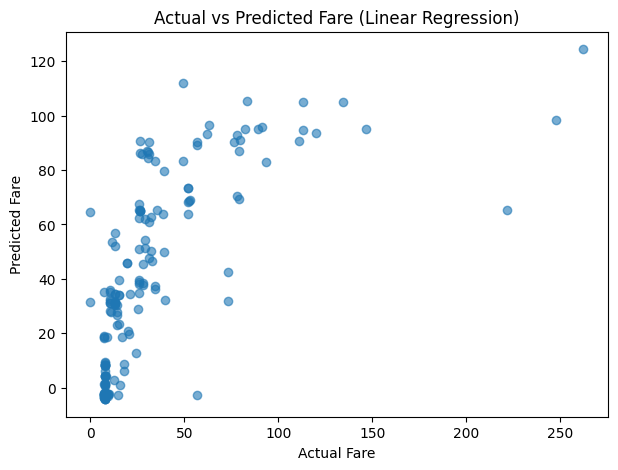

In [58]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Dataset
titanic = sns.load_dataset("titanic")

# Step 2: Handle Missing Data
# Drop irrelevant or highly missing columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

# Fill missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Step 3: Encode Categorical Variables
categorical_features = ['sex', 'embarked', 'alone']
numerical_features = ['age', 'pclass', 'sibsp', 'parch']  # Removed 'fare' from features

# Column Transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Step 4: Define Features (X) and Target (y)
X = titanic[numerical_features + categorical_features]  # Only select relevant features
y = titanic['fare']  # Target variable

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build the Model Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Step 7: Predict & Evaluate the Model
y_pred = model_pipeline.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Step 8: Visualize Predictions vs. Actual Values
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare (Linear Regression)")
plt.show()


In [4]:
import seaborn as sns

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
print(titanic.head())  # Check the first few rows


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
import seaborn as sns

# Load dataset
titanic = sns.load_dataset("titanic")

# Define X (features) and y (target)
X = titanic.drop(columns=['survived'])  # Drop the target column
y = titanic['survived']  # Define target variable

print(X.shape)  # Check dimensions
print(y.shape)


(891, 14)
(891,)


In [30]:
m= X.shape[0] # # of samples
n = X.shape[1] # # of features
print(X.iloc[0])    #big letter X represents matrix

pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object


In [7]:


# Define target (y)
y = titanic["survived"]  # Use the correct column name

print(y.shape)  # Output: (891,)
print("First few values:", y.head(3))


(891,)
First few values: 0    0
1    1
2    1
Name: survived, dtype: int64


In [8]:
assert m == y.shape[0]

In [ ]:
# 1.2 Split Train test split your data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
y_test.shape


(179,)

In [38]:
from sklearn.preprocessing import StandardScaler

# Ensure X_train is a DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

# Convert all columns to numeric (ignore errors for non-convertible ones)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 (or use another strategy like mean imputation)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print first row after transformation
print(X_train[0])


[ 0.84102369  0.         -0.50982068  0.41786187 -0.47755447 -0.3618773
  0.          0.          0.         -1.24946032  0.          0.
  0.         -1.21335165]


In [40]:
X_train[0]

array([ 0.84102369,  0.        , -0.50982068,  0.41786187, -0.47755447,
       -0.3618773 ,  0.        ,  0.        ,  0.        , -1.24946032,
        0.        ,  0.        ,  0.        , -1.21335165])

In [41]:
# 1.4 Add intercepts
'''
y = mx + b
y = 2*2 + 3*1 + w0

X = [1 2 3     @ [w0
     1 4 6        w1=2
     1 9 10]      w2=1
     
X @ w = [7
         14
         28 ]

Typical hypothesis function in linear regression:  Theta^T x
'''



'\ny = mx + b\ny = 2*2 + 3*1 + w0\n\nX = [1 2 3     @ [w0\n     1 4 6        w1=2\n     1 9 10]      w2=1\n     \nX @ w = [7\n         14\n         28 ]\n\nTypical hypothesis function in linear regression:  Theta^T x\n'

In [42]:
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis = 1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis = 1)
X_test[0]

array([ 1.        , -1.52580978,  0.        , -1.35573709, -0.47290954,
       -0.47755447,  0.87641413,  0.        ,  0.        ,  0.        ,
       -1.24946032,  0.        ,  0.        ,  0.        ,  0.82416338])

In [76]:
feature_names = titanic.columns
print(feature_names)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alone'],
      dtype='object')


In [43]:
# 1.5. Feature Engineering (optional)

# It is sometimes useful to engineer new features (e.g., polynomial, kernels) so to create some non-linear relationships with your target. Here we gonna skip


from time import time

theta = np.zeros(X_train.shape[1])

lr = 0.001 #alpha

max_iter = 50

#three steps to gradient descent

start = time()

for i in range(max_iter):
    #1. prediction
    # X @ w
    y_hat = X_train @ theta

    #2. calculate gradient
    # grad = X^T (h - y)
    grad = X_train.T @ (y_hat - y_train)

    #3. update the theta
    # w = w - lr * grad
    theta = theta - lr * grad

time_taken = time() - start

print("Time taken: ", time_taken)
print("Theta: ", theta)

Time taken:  0.06344246864318848
Theta:  [ 0.38483146 -0.11727536  0.         -0.02276245 -0.09870332 -0.05321446
  0.02308648  0.          0.          0.         -0.28404256  0.
  0.          0.         -0.04647426]


In [48]:
## 2.2 Compute accuracy/loss

#for regression, mean squared error
#for classification, accuracy, recall, precision


def mse(yhat, y):
   return  ((yhat - y)**2).sum() / yhat.shape[0]


#training mse
yhat_train = X_train @ theta

mse_train = mse(yhat_train, y_train)

print("MSE train: ", mse_train)

#testing mse

yhat_test = X_test @ theta

mse_test = mse(yhat_test, y_test)

print("MSE test: ", mse_test)

MSE train:  0.12973410933426469
MSE test:  0.15841076859429698


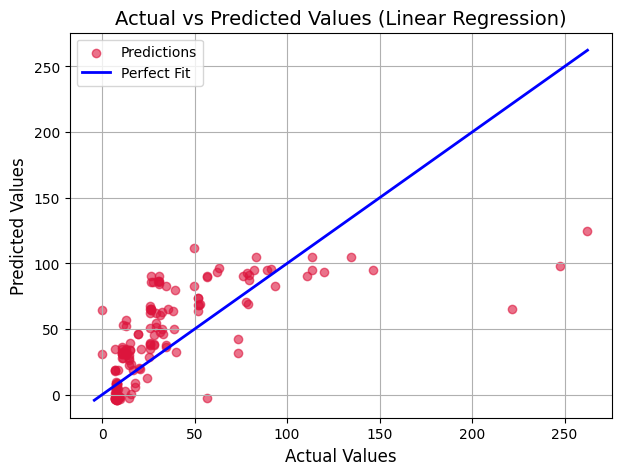

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, c='crimson', alpha=0.6, label="Predictions")

# Diagonal Line for Perfect Predictions
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=2, label="Perfect Fit")

# Formatting the Plot
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values (Linear Regression)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [62]:
X_train.iloc[0]
my_sample = np.array([3, -0.3, -0.95877769, -1.07310168, -0.71363498,
       -0.94063341, -0.75663014,  0.30179749, -0.77440695, -1.36631681,
       -0.59408791])

In [64]:
X_test.iloc[0]

age          28.0
pclass          3
sibsp           1
parch           1
sex          male
embarked        C
alone       False
Name: 709, dtype: object

In [72]:
print("X_test_array shape:", X_test_array.shape)  # Should be (n_samples, n_features)
print("Theta shape:", theta.shape)  # Should be (n_features,) or (n_features, 1)
theta = theta.reshape(-1, 1)



X_test_array shape: (179, 7)
Theta shape: (15, 1)
